# 🚧 **Keys to Better Image Inpainting: Structure and Texture Go Hand in Hand** 🚧

[[`Project Page`](https://praeclarumjj3.github.io/fcf-inpainting/)] [[`arXiv`](https://arxiv.org/abs/2208.03382)] [[`GitHub`](https://github.com/SHI-Labs/FcF-Inpainting)]

#### Our FcF-Inpainting frameworks generates good structures and textures simultaneously. You can try a demo yourself using our model trained on 512x512 Places2 images!

## **Try Filling in the Holes!** ✌

#### If you found the demo useful in your research, please consider starring ⭐ us on [[`GitHub`](https://github.com/SHI-Labs/FcF-Inpainting)] and citing 📚 us in your research!

# Setup

Run the code in the cells below to setup conda environment and download the required dependencies.

In [ ]:
######
#@title 1. Install Miniconda
######
%%capture
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-latest-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [ ]:
######
#@title 2. Clone the FcF-Inpainting Repo
######
%%capture
%%bash
rm -rf FcF-Inpainting/
git clone https://github.com/SHI-Labs/FcF-Inpainting
cd FcF-Inpainting/
pwd

In [ ]:
######
#@title 3. Create Conda Environment
######
%%capture
%%bash
conda init bash
conda env remove -n fcf
conda create --name fcf -y python=3.7

In [ ]:
######
#@title 4. Install Dependencies. It may take several minutes for all installations to finish.
######
%%capture
%%bash
source activate fcf
conda env list
conda install pytorch==1.7.1 torchvision==0.8.2 torchaudio==0.7.2 cudatoolkit=11.0 -c pytorch
cd /content/FcF-Inpainting/
pip3 install -r requirements.txt --quiet
pip3 uninstall opencv-python-headless -y --quiet
pip3 install opencv-python-headless --quiet

In [ ]:
######
#@title 5. Define Draw Mask Function
######

canvas_html = """
<style>
.button {
  background-color: #4CAF50;
  border: none;
  color: white;
  padding: 15px 32px;
  text-align: center;
  text-decoration: none;
  display: inline-block;
  font-size: 16px;
  margin: 4px 2px;
  cursor: pointer;
}
</style>
<canvas1 width=%d height=%d>
</canvas1>
<canvas width=%d height=%d>
</canvas>

<button class="button">Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')

var canvas1 = document.querySelector('canvas1')
var ctx1 = canvas.getContext('2d')


ctx.strokeStyle = 'red';

var img = new Image();
img.src = "data:image/%s;charset=utf-8;base64,%s";
console.log(img)
img.onload = function() {
  ctx1.drawImage(img, 0, 0);
};
img.crossOrigin = 'Anonymous';

ctx.clearRect(0, 0, canvas.width, canvas.height);

ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}

canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}

var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

import base64, os
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
from shutil import copyfile
import shutil

def draw(imgm, filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, w,h, filename.split('.')[-1], imgm, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)

In [ ]:
######
#@title 6. Download checkpoint for 512x512 Places2
######
%%bash
cd /content/FcF-Inpainting/
pip install --upgrade --no-cache-dir gdown --quiet
gdown https://drive.google.com/uc?id=1-44Esd02ReZwFNGq6_epjQ4s-2P6iUdL

Downloading...
From: https://drive.google.com/uc?id=1-44Esd02ReZwFNGq6_epjQ4s-2P6iUdL
To: /content/FcF-Inpainting/places_512.pkl
100%|██████████| 803M/803M [00:03<00:00, 251MB/s]


# Test on Demo Images

Run the code in the cells below to test on images. You can either hand-draw masks (8a) or upload your own masks (8b).

In [ ]:
######
#@title 7. Upload Demo Images (512x512)
######
from google.colab import files
files = files.upload()
fnames = list(files.keys())

shutil.rmtree('./colab_data', ignore_errors=True)
! mkdir colab_data

for fn in fnames:
  copyfile(fn, f'./colab_data/{fn}')
  os.remove(fn)

Saving 6458524847_2f4c361183_k.png to 6458524847_2f4c361183_k.png


## Draw or Upload Masks for inpainting

Will use ./colab_data/6458524847_2f4c361183_k.png for inpainting


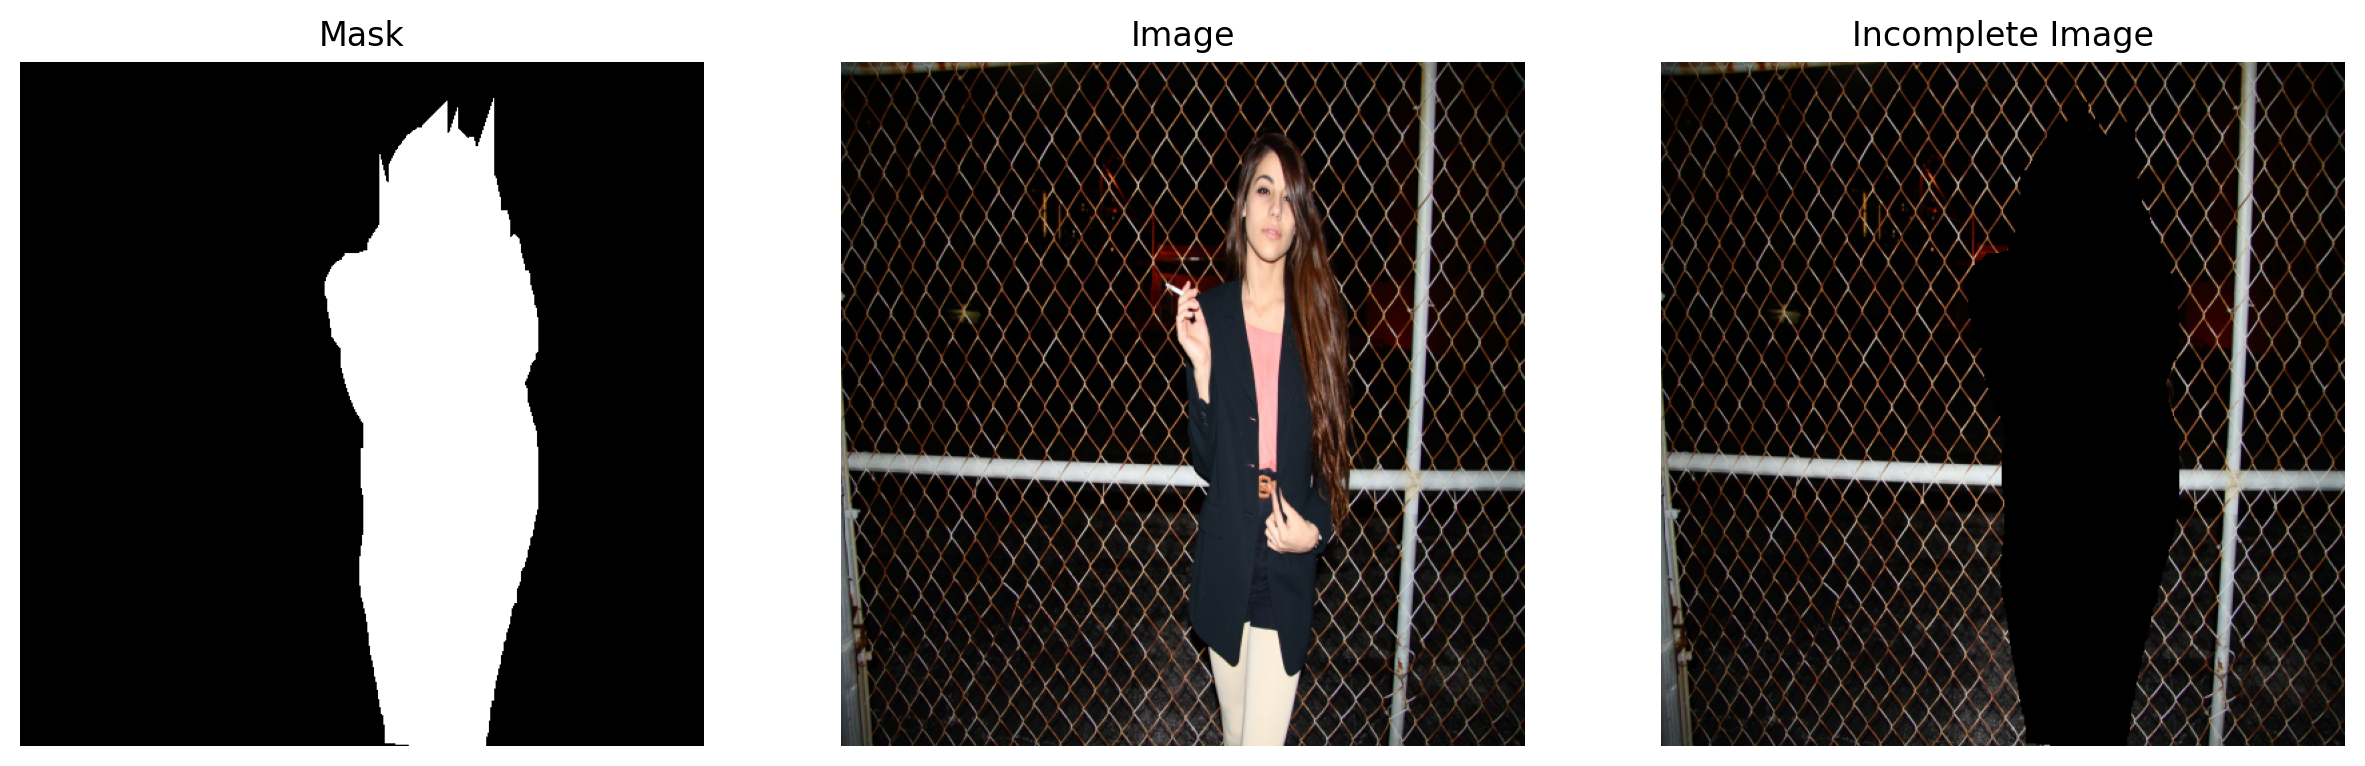

In [ ]:
#@title 8a. Draw Mask on a Chosen Image 🖌
################
fname=f'./colab_data/{fnames[0]}'  ## Write filename here
################
image64 = base64.b64encode(open(fname, 'rb').read())
image64 = image64.decode('utf-8')

print(f'Will use {fname} for inpainting')
img = np.array(plt.imread(f'{fname}')[:,:,:3])

draw(image64, filename=f"./{fname.split('.')[1]}_mask.png", w=img.shape[1], h=img.shape[0], line_width=0.04*img.shape[1])

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)
with_mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png")[:,:,:3])
mask = (with_mask[:,:,0]==1)*(with_mask[:,:,1]==0)*(with_mask[:,:,2]==0)
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('Mask')
plt.imsave(f"./{fname.split('.')[1]}_mask.png",mask, cmap='gray')

plt.subplot(132)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('Image')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('Incomplete Image')
plt.show()

# OR

In [ ]:
#@title 8a. Upload Mask ⬆
################
fname=f'./colab_data/{fnames[0]}'  ## Write filename here
################
from google.colab import files
files = files.upload()
msk_names = list(files.keys())

for fn in msk_names:
  copyfile(fn, f'./colab_data/{fn}')
  os.remove(fn)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(131)
mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png"))
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('Mask')

plt.subplot(132)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('Image')

plt.subplot(133)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('Incomplete Image')
plt.show()

### 9. Run FcF-Inpainting

##### `Note`: Remember to specify the file name in the code cell.

It may take several minutes. The results are saved to `outputs` folder.

In [ ]:
%%bash
################
export fname=6458524847_2f4c361183_k.png  ## Write filename here
################
cd /content/FcF-Inpainting/
source activate fcf
pip3 install -r requirements.txt --quiet
python colab_demo.py --img_path ../colab_data/$fname --output ../outputs --ckpt places_512.pkl
echo "Saved results to outputs/..."

Loading networks from "places_512.pkl"...
Generator Params: 85.086823 M
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Saved results to outputs/...


### 10. Plot Inpainted Image

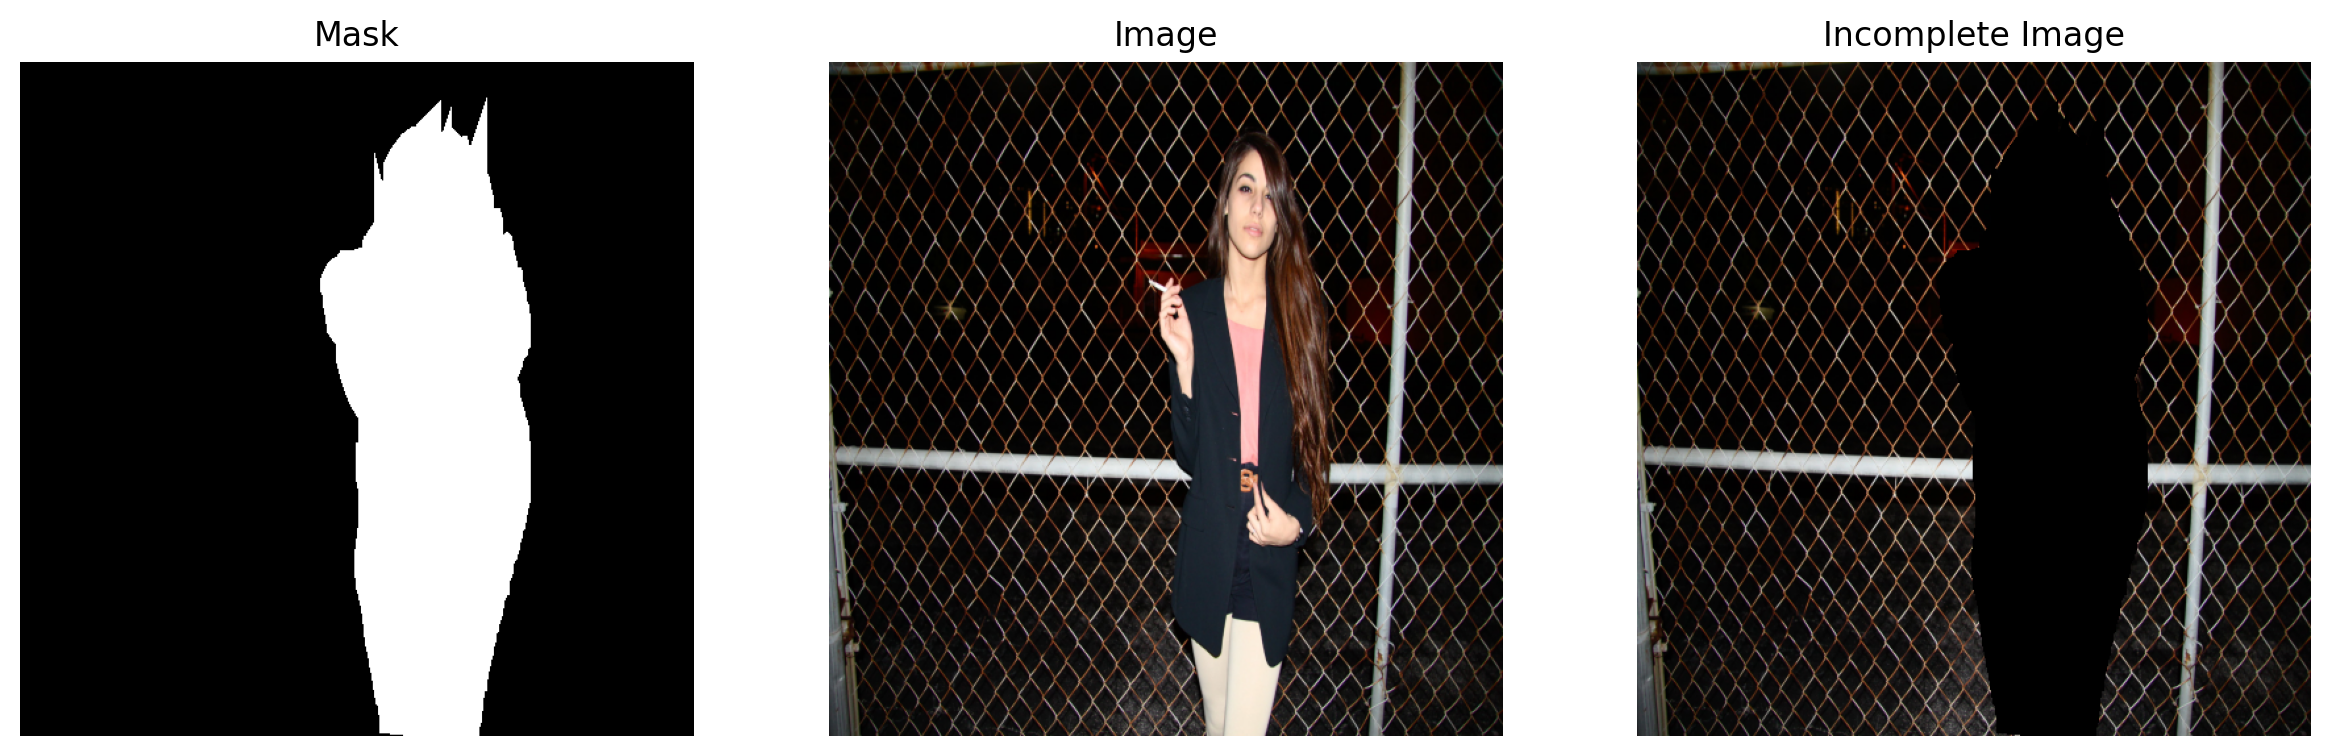

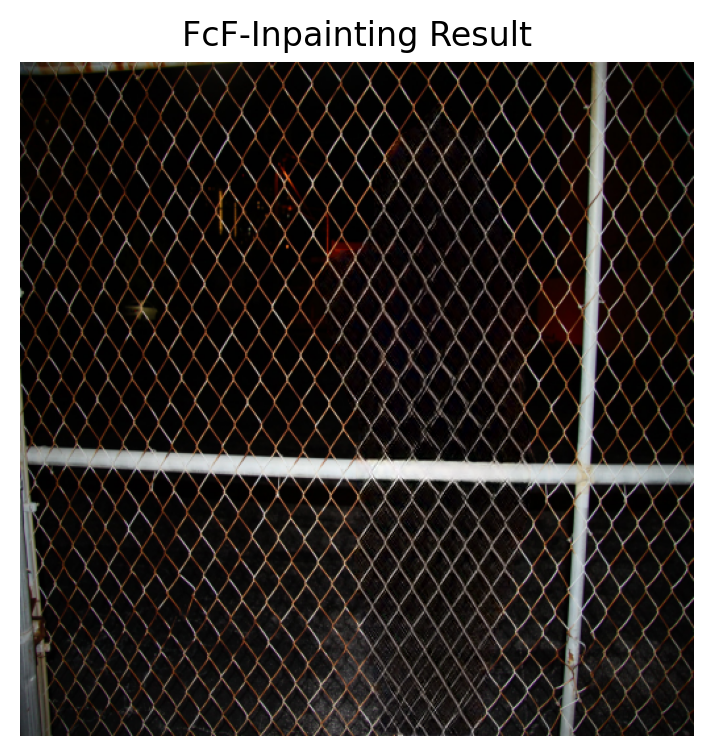

In [ ]:
################
fname=f'./colab_data/{fnames[0]}'
iname=fname.split('/')[-1]  ## Write filename here
################
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams['figure.dpi'] = 200
plt.subplot(141)
mask = np.array(plt.imread(f"./{fname.split('.')[1]}_mask.png")[:,:,:3])
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.title('Mask')

plt.subplot(142)
img = np.array(plt.imread(f'{fname}')[:,:,:3])
plt.imshow(img)
plt.axis('off')
plt.title('Image')

plt.subplot(143)
img = np.array((1-mask.reshape(mask.shape[0], mask.shape[1], -1))*plt.imread(fname)[:,:,:3])
_=plt.imshow(img)
_=plt.axis('off')
_=plt.title('Incomplete Image')
plt.show()

plt.subplot(144)
comp_img = np.array(plt.imread(f"outputs/{iname}")[:,:,:3])
plt.imshow(comp_img)
_=plt.axis('off')
_=plt.title('FcF-Inpainting Result')